<a href="https://colab.research.google.com/github/woodword-0/ML-Algorithms/blob/main/GaussBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

In [17]:
df1 = pd.read_csv('/content/MNIST_train.csv')
df2 = pd.read_csv('/content/MNIST_test.csv')

In [18]:
X_train = (1/255)*df1.iloc[:,3:].to_numpy()
y_train = df1.iloc[:,2].to_numpy()
X_test = (1/255)*df2.iloc[:,3:].to_numpy()
y_test = df2.iloc[:, 2].to_numpy()

In [ ]:
np.dot(X_test,X_test[3])

array([40.25433295, 50.24499808, 15.48865821, ..., 56.60335256,
       55.06352941, 96.71446367])

In [19]:
class GaussNB():
    """Naive Bayes model"""
    def __init__(self):
        pass

    def fit(self, X:np.array, y:np.array, epsilon:int=1e-1) -> None:
        self.likelihoods = dict()
        self.priors = dict()

        self.K = set(y.astype(int)) # list of classes

        for k in self.K:
            X_k = X[y==k,:]
            self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k) / len(X)


    def predict(self, X: np.array) -> np.array:
        N, D = X.shape

        P_hat = np.zeros((N, len(self.K)))

        for k, l in self.likelihoods.items():
            P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"] + np.log(self.priors[k]))
        
        return P_hat.argmax(axis=1)


class GaussBayes:

    def fit(self, X:np.array, y:np.array, epsilon:int = 1e-3) -> None:
        self.likelihoods = dict()
        self.priors = dict()

        self.K = set(y.astype(int))

        for k in self.K:
            X_k = X[y==k,:]
            N_k, D = X_k.shape
            mu_k = X_k.mean(axis=0)
            self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": (1 / (N_k - 1)) * np.matmul((X_k-mu_k).T, X_k - mu_k) + epsilon*np.identity(D)} 

            self.priors[k] = len(X_k) / len(X)
    
    def predict(self, X:np.array) -> np.array:
        N, D = X.shape
        P_hat = np.zeros((N, len(self.K)))

        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

        return P_hat.argmax(axis=1)

In [26]:
# Checks accuracy of model
gbayes = GaussBayes()
gbayes.fit(X_train,y_train)
y_hat_GB = gbayes.predict(X_train)

In [27]:
def accuracyGB(y_train,y_hat_GB):
    return np.mean(y_train == y_hat_GB)

In [28]:
print(accuracyGB(y_train ,y_hat_GB))

0.9306333333333333


In [29]:
gbayes = GaussBayes()
gbayes.fit(X_train,y_train)
y_hat_GB = gbayes.predict(X_test)

In [24]:
def accuracyGB(y_test,y_hat_GB):
    return np.mean(y_test == y_hat_GB)

In [30]:
print(accuracyGB(y_test ,y_hat_GB))

0.9108


In [ ]:
def show_me(X):
  plt.imshow(X.reshape(28,28))
def show_me_allmean(X,y,k):
  show_me(X[y==k,:]/len(X[y==k,:]))

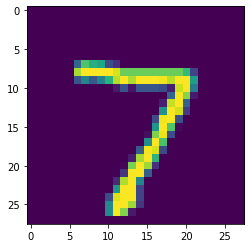

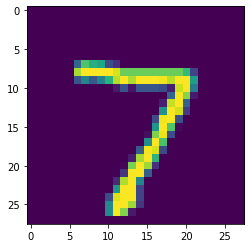

In [ ]:
show_me(X_test[0])

In [ ]:
gbayes.predict(X_test[0:1])

array([7])

In [ ]:
X_test[9:1].shape

(0, 784)

In [ ]:
type(X_test[0])

numpy.ndarray

In [ ]:
X_test[0].shape

(784,)

In [ ]:
plt.figure(figsize = (10,7))
y_actu = pd.Series(y, name = 'Actual')
